In [52]:
import os
import numpy as np
import pandas as pd
import librosa
import sys
import matplotlib.pyplot as plt
import librosa.display
import plotly.express as px
from sklearn.decomposition import PCA
from fnmatch import fnmatch
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [53]:
sample_audio = "C:\\Users\\zrahu\\Desktop\\BeatBot\\Dataset\\GenreModel\\genres_original\\blues\\blues.00001.wav"


In [54]:

print(sample_audio)
import os

if not os.path.exists(sample_audio):
    raise FileNotFoundError("File not found:", sample_audio)


C:\Users\zrahu\Desktop\BeatBot\Dataset\GenreModel\genres_original\blues\blues.00001.wav


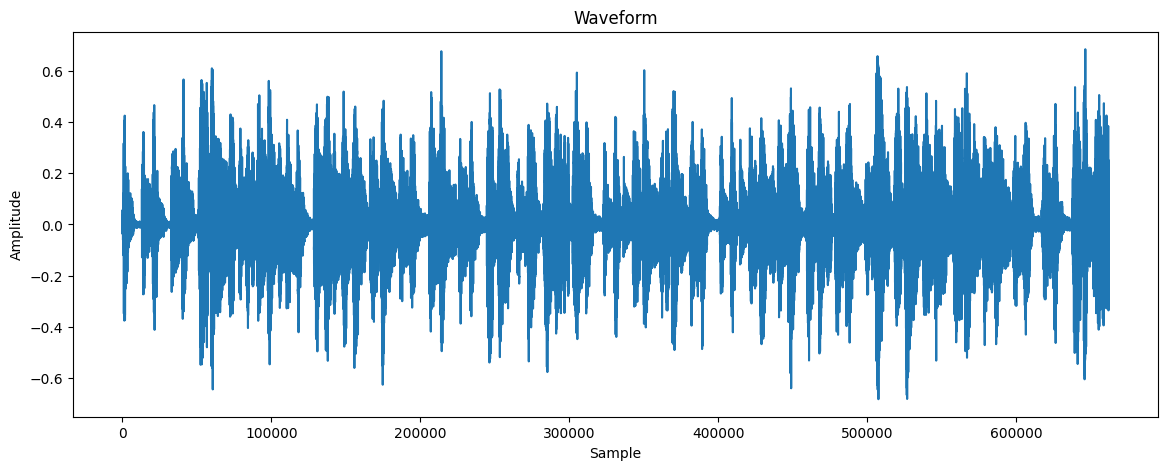

In [55]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
x, sr = librosa.load(sample_audio)

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(x)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


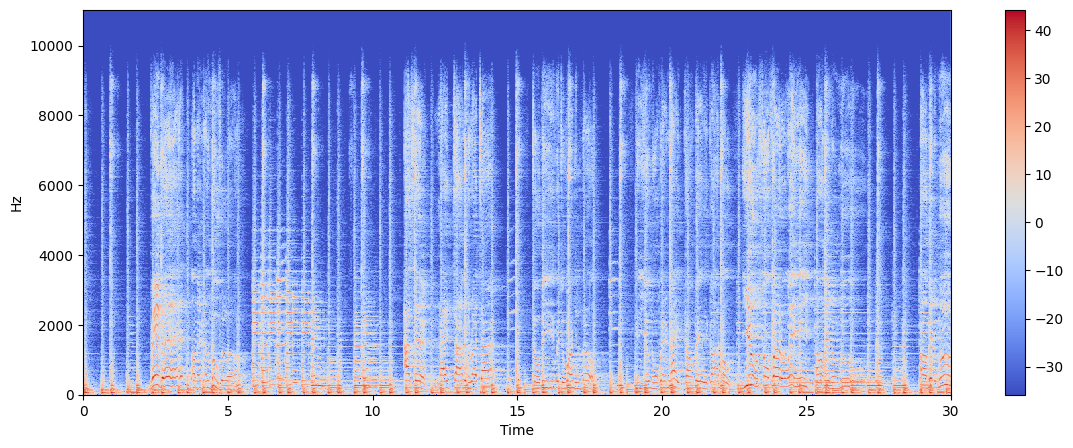

In [56]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


In [57]:
#specifying the dataset path for further processing

WAV_DIR = 'C:\\Users\\zrahu\\Desktop\\BeatBot\\Dataset\\GenreModel\\genres_original'
wav_files = os.listdir(WAV_DIR)
print(wav_files, len(wav_files))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'] 10


In [58]:
#defining the column names related to features ,
#which process through pandas dataframe, for feature extraction purpose


col_names = ['file_name', 'genre name','zcr_mean', 'zcr_std',
             'spectral_centroid_mean', 'spectral_centroid_std'] +\
                     ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)]
dfppt= pd.DataFrame(columns=col_names)
print(dfppt)


Empty DataFrame
Columns: [file_name, genre name, zcr_mean, zcr_std, spectral_centroid_mean, spectral_centroid_std, spectral_rolloff_mean, spectral_rolloff_std, mfccs_1_mean, mfccs_2_mean, mfccs_3_mean, mfccs_4_mean, mfccs_5_mean, mfccs_6_mean, mfccs_7_mean, mfccs_8_mean, mfccs_9_mean, mfccs_10_mean, mfccs_11_mean, mfccs_12_mean, mfccs_13_mean, mfccs_14_mean, mfccs_15_mean, mfccs_16_mean, mfccs_17_mean, mfccs_18_mean, mfccs_19_mean, mfccs_20_mean, mfccs_1_std, mfccs_2_std, mfccs_3_std, mfccs_4_std, mfccs_5_std, mfccs_6_std, mfccs_7_std, mfccs_8_std, mfccs_9_std, mfccs_10_std, mfccs_11_std, mfccs_12_std, mfccs_13_std, mfccs_14_std, mfccs_15_std, mfccs_16_std, mfccs_17_std, mfccs_18_std, mfccs_19_std, mfccs_20_std]
Index: []

[0 rows x 48 columns]


In [59]:
def AudioFeatureExtraction(tmp, sr, feature_list=None):
    if feature_list is None:
        feature_list = []

    zcr = librosa.feature.zero_crossing_rate(tmp)[0]
    feature_list.append(np.mean(zcr))
    feature_list.append(np.std(zcr))
    spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
    feature_list.append(np.mean(spectral_centroids))
    feature_list.append(np.std(spectral_centroids))
    spectral_rolloff = librosa.feature.spectral_rolloff(tmp, sr=sr)[0]
    feature_list.append(np.mean(spectral_rolloff))
    feature_list.append(np.std(spectral_rolloff))

    mfccs = librosa.feature.mfcc(tmp, sr=sr)
    feature_list.extend(np.mean(mfccs, axis=1))
    feature_list.extend(np.std(mfccs, axis=1))
    
    return feature_list


In [60]:
from fnmatch import fnmatch
import os
import pandas as pd
import numpy as np
import librosa

# Initialize an empty DataFrame to store the features
col_names = ['filename', 'label']  # Assuming these are the column names
dfppt = pd.DataFrame(columns=col_names)

root = 'C:\\Users\\zrahu\\Desktop\\BeatBot\\Dataset\\GenreModel'
pattern = "*.wav"
cnt = 0

# To iterate through every file in subfolder
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            xx = os.path.join(path, name)
            try:
                cnt += 1
                print(cnt)
                print(name)
                y, sr = librosa.load(xx, sr=22050)
                feature_list = [name]
                temp = name.split('.')
                feature_list.append(temp[0])
                # Assuming AudioFeatureExtraction is defined elsewhere and returns a list of features
                feature_list = AudioFeatureExtraction(xx, feature_list)
                feature_list[2:] = np.round(feature_list[2:], decimals=3)
                dfppt = dfppt.append(pd.DataFrame([feature_list], columns=col_names), ignore_index=True)
            except:
                pass

# Save file
dfppt.to_csv('featuresss.csv', index=False)


1
blues.00001.wav
2
blues.00002.wav
3
blues.00003.wav
4
blues.00004.wav
5
blues.00005.wav
6
blues.00006.wav
7
blues.00007.wav
8
blues.00008.wav
9
blues.00009.wav
10
blues.00010.wav
11
blues.00011.wav
12
blues.00012.wav
13
blues.00013.wav
14
blues.00014.wav
15
blues.00015.wav
16
blues.00016.wav
17
blues.00017.wav
18
blues.00018.wav
19
blues.00019.wav
20
blues.00020.wav
21
blues.00021.wav
22
blues.00022.wav
23
blues.00023.wav
24
blues.00024.wav
25
blues.00025.wav
26
blues.00026.wav
27
blues.00027.wav
28
blues.00028.wav
29
blues.00029.wav
30
blues.00030.wav
31
blues.00031.wav
32
blues.00032.wav
33
blues.00033.wav
34
blues.00034.wav
35
blues.00035.wav
36
blues.00036.wav
37
blues.00037.wav
38
blues.00038.wav
39
blues.00039.wav
40
blues.00040.wav
41
blues.00041.wav
42
blues.00042.wav
43
blues.00043.wav
44
blues.00044.wav
45
blues.00045.wav
46
blues.00046.wav
47
blues.00047.wav
48
blues.00048.wav
49
blues.00049.wav
50
blues.00050.wav
51
blues.00051.wav
52
blues.00052.wav
53
blues.00053.wav
54

In [61]:
dfppt = pd.read_csv(r'C:\\Users\\zrahu\\Desktop\\BeatBot\\Dataset\\GenreModel\\featuresss.csv')
print (dfppt)

           file_name genre name  zcr_mean  zcr_std  spectral_centroid_mean  \
0     jazz.00002.wav       jazz     0.058    0.030                1027.444   
1     jazz.00000.wav       jazz     0.078    0.049                1434.300   
2     jazz.00005.wav       jazz     0.058    0.030                1228.790   
3     jazz.00004.wav       jazz     0.048    0.023                1002.328   
4     jazz.00003.wav       jazz     0.045    0.014                 768.097   
...              ...        ...       ...      ...                     ...   
2995   pop.00097.wav        pop     0.137    0.142                3482.045   
2996   pop.00091.wav        pop     0.167    0.099                3676.932   
2997   pop.00095.wav        pop     0.106    0.066                3032.248   
2998   pop.00096.wav        pop     0.105    0.064                3105.976   
2999   pop.00090.wav        pop     0.148    0.088                3578.279   

      spectral_centroid_std  spectral_rolloff_mean  spectral_ro

In [62]:
%matplotlib notebook

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = dfppt.iloc[:,2:]
y = dfppt['genre name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12,random_state=3)
print(X_train.shape)
print(y_train.shape)

(2640, 46)
(2640,)


In [63]:
print(dfppt.columns)

Index(['file_name', 'genre name', 'zcr_mean', 'zcr_std',
       'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_rolloff_mean', 'spectral_rolloff_std', 'mfccs_1_mean',
       'mfccs_2_mean', 'mfccs_3_mean', 'mfccs_4_mean', 'mfccs_5_mean',
       'mfccs_6_mean', 'mfccs_7_mean', 'mfccs_8_mean', 'mfccs_9_mean',
       'mfccs_10_mean', 'mfccs_11_mean', 'mfccs_12_mean', 'mfccs_13_mean',
       'mfccs_14_mean', 'mfccs_15_mean', 'mfccs_16_mean', 'mfccs_17_mean',
       'mfccs_18_mean', 'mfccs_19_mean', 'mfccs_20_mean', 'mfccs_1_std',
       'mfccs_2_std', 'mfccs_3_std', 'mfccs_4_std', 'mfccs_5_std',
       'mfccs_6_std', 'mfccs_7_std', 'mfccs_8_std', 'mfccs_9_std',
       'mfccs_10_std', 'mfccs_11_std', 'mfccs_12_std', 'mfccs_13_std',
       'mfccs_14_std', 'mfccs_15_std', 'mfccs_16_std', 'mfccs_17_std',
       'mfccs_18_std', 'mfccs_19_std', 'mfccs_20_std'],
      dtype='object')


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
x_train=X_train_scaled
x_test=X_test_scaled
print(X_train)
print(X_test)

      zcr_mean  zcr_std  spectral_centroid_mean  spectral_centroid_std  \
2596     0.054    0.031                1894.420                550.314   
1244     0.081    0.051                2269.580                864.222   
1167     0.065    0.037                2144.180                714.510   
41       0.066    0.024                1527.615                278.541   
1796     0.167    0.034                2311.631                355.319   
...        ...      ...                     ...                    ...   
2304     0.077    0.049                1802.526                732.045   
968      0.206    0.111                3590.510               1022.771   
1667     0.122    0.063                2308.076                589.579   
1688     0.032    0.040                 866.748                713.479   
1898     0.116    0.061                2211.587                624.819   

      spectral_rolloff_mean  spectral_rolloff_std  mfccs_1_mean  mfccs_2_mean  \
2596               4355.236   

In [65]:
from sklearn import svm
clfr = svm.SVC(kernel='rbf',C=11,probability=True)

clfr.fit(x_train,y_train)

print("accuracy is ",clfr.score(x_test,y_test))

accuracy is  0.9888888888888889


In [66]:
from sklearn.metrics import confusion_matrix
ypred=clfr.predict(x_test)
cm = confusion_matrix(y_test,ypred)
#print(cm)

import seaborn as sns


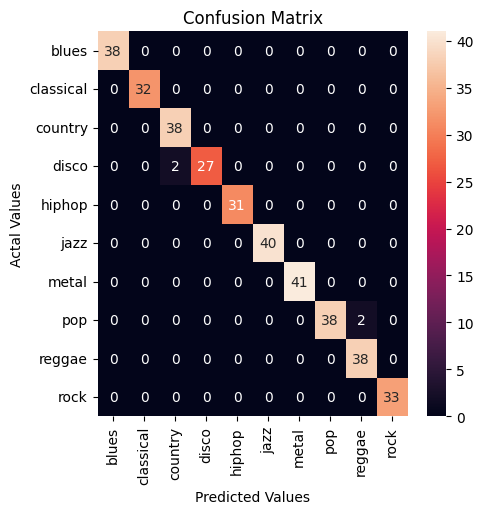

In [67]:

%matplotlib inline
cm_df = pd.DataFrame(cm,
                     index = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'],
                     columns = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'])
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [68]:

from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))


              precision    recall  f1-score   support

       blues       1.00      1.00      1.00        38
   classical       1.00      1.00      1.00        32
     country       0.95      1.00      0.97        38
       disco       1.00      0.93      0.96        29
      hiphop       1.00      1.00      1.00        31
        jazz       1.00      1.00      1.00        40
       metal       1.00      1.00      1.00        41
         pop       1.00      0.95      0.97        40
      reggae       0.95      1.00      0.97        38
        rock       1.00      1.00      1.00        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [69]:

import warnings
warnings.filterwarnings('ignore')

In [70]:
#single genre
ext="C:\\Users\\zrahu\\Desktop\\BeatBot\\Audio\\jazz.00000.wav"
y, sr = librosa.load(ext, sr = 22050)
temp_features=AudioFeatureExtraction(y, sr)
temp_features = np.round(temp_features, decimals=3)
temp_flist=np.array(temp_features)
tempp=scaler.transform([temp_flist])
pred=clfr.predict(tempp)
print(pred)

TypeError: spectral_centroid() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given

In [71]:
# Load the audio file for prediction
audio_file_path = "C:\\Users\\zrahu\\Desktop\\BeatBot\\uploads\\input_audio.wav"
y_pred, sr_pred = librosa.load(audio_file_path, sr=22050)

# Extract features from the audio file
features_pred = AudioFeatureExtraction(y_pred, sr_pred)
features_pred = np.round(features_pred, decimals=3)

# Scale the features using the same scaler used during training
scaled_features_pred = scaler.transform([features_pred])

# Predict the genre using the trained classifier
predicted_genre = clfr.predict(scaled_features_pred)
print("Predicted Genre:", predicted_genre)


TypeError: spectral_centroid() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given